In [1]:
# Import the basic python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style='white', context='notebook', palette='deep')
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the datasets
train = pd.read_csv("train.csv")# non devo specificare la cartella perchè questo file è nella stessa cartella 
test = pd.read_csv("test.csv") # non devo specificare la cartella perchè questo file è nella stessa cartella 
IDtest = test["PassengerId"]
train.info()# We have 891 observations & 12 columns. See the mix of variable types.
test.info()# We have 417 observations & 11 columns (no response 'Survived' column).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [7]:
# Check missing values in train data set
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
miss_train = pd.DataFrame({'Train Missing Ratio' :train_na})
miss_train.head()

,Train Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


In [8]:
# Check missing values in train data set
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
miss_test = pd.DataFrame({'Test Missing Ratio' :test_na})
miss_test.head()

,Test Missing Ratio
Cabin,78.229665
Age,20.574163
Fare,0.239234


In [9]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)
test = test.fillna(np.nan)

#### PassengerId non rilevante dal punto di vista della modellazione, quindi elimineremo questa variabile in un secondo momento

#### Pclass è una variabile categoriale. Diamo un'occhiata alla distribuzione.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


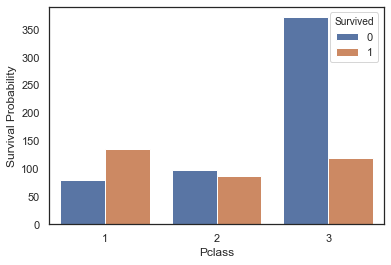

In [10]:
# Analyze the count of survivors by Pclass
ax = sns.countplot(x="Pclass", hue="Survived", data=train)
train[['Pclass', 'Survived']].groupby(['Pclass']).count().sort_values(by='Survived', ascending=False)

# Analyze the Survival Probability by Pclass
g = sns.barplot(x="Pclass",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

#### Approximately 62% of Pclass = 1 passenger survived followed by 47% of Pclass2.

#### Name: non rilevante dal punto di vista dell'analisi e della modellazione.
#### Rilasceremo questa funzione in seguito dopo aver creato una nuova variabile come Titolo.

#### Sex: Sulla base dell'analisi che segue, le donne avevano maggiori possibilità di sopravvivenza.



,Survived
Sex,
male,577
female,314


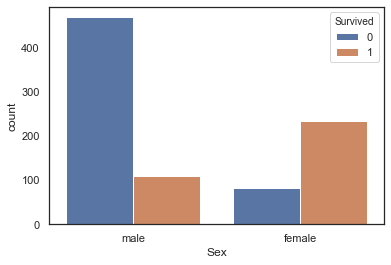

In [12]:
# Count the number of passengers by gender
ax = sns.countplot(x="Sex", hue="Survived", data=train)
# Analyze survival count by gender
train[["Sex", "Survived"]].groupby(['Sex']).count().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


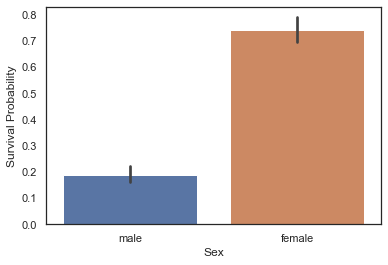

In [13]:
# Analyze the Survival Probability by Gender
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

#### Sulla base dei dati di cui sopra, i passeggeri di sesso femminile avevano maggiori possibilità di sopravvivenza 
#### rispetto ai passeggeri di sesso maschile

#### Age: L'intuizione di seguito si collega alla scena del film "Ladies and Kids First". Mostra che un buon numero di neonati e bambini è sopravvissuto.
    

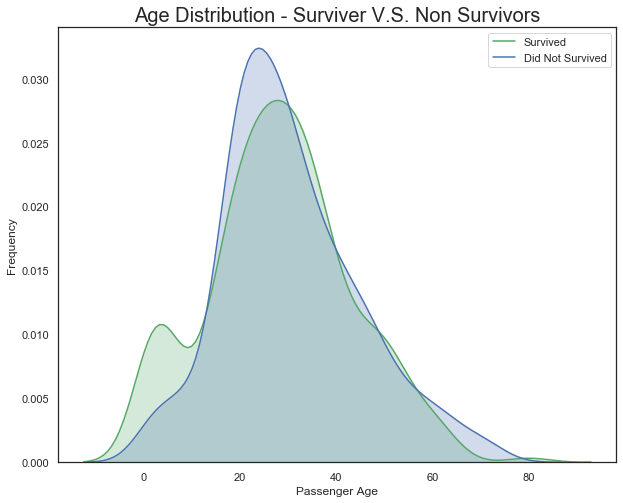

In [14]:
# Let's explore the distribution of age by response variable (Survived)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='Survived')
axis = sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='b',shade=True,label='Did Not Survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 20)
plt.xlabel("Passenger Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);